# Pythonic Harmonies

## Preparing Your Computer

While there's no shortage of online tutorials explaining how to set up Python on your machine, this guide will simplify the process, focusing on the essentials of starting up with Djalgo, with an introduction to Python and how to use it as a tool for music composition.

### Leveraging Cloud Computing

Your web browser and a service provider can be your music composing tool. Navigate to a cloud computing service, sign up for a free plan, and you're a couple of steps away from being a music coder. Platforms like Deepnote and Google Colab let you write code, display musical scores, and play MIDI files directly from a notebook-style interface. Bear in mind, though, that free plans generally come with service-specific limitations. While processor and RAM limitations won't hinder simple music composition methods, more advanced techniques like machine learning-based ones could experience a slower workflow. In any case, opening your pockets to a service you love can be rewarding, or course for your service provider, but also for you.

Despite these limitations, Deepnote's default computing environments, and to a lesser extent Colab's, both come with a range of handy data science tools, although you will need to install a specific application and a few Python packages at the beginning of each session.

Deepnote and Colab both work on the background with Debian Linux containers. To access to the system, you just add a `!` before the command. For instance, you'll have to access to the system to install MuseScore, an application supported in this book for visualizing musical scores created with the Music21 Python package.  The first line of code in each session should thus be `!apt update`, a command instructing Debian to fetch the list of packages installed in the Linux environment and those available for installation. Subsequently, `!apt install musescore -y` proceeds with the installation of Musescore, with the `-y` argument acting as a confirmation for the installation.

Utilizing the command `!pip install <package>`, you can install any Python package of your choice, no separate installation confirmation needed with `pip`. For instance, if you're keen on incorporating the Music21 package, as well as Djalgo, execute the following command.

Then you can start harmonizing with Python. Or maybe you'll prefer installing everything on your machine?

### Machine Setup Instructions

For this book, I recommend installing a Python release from the Python Foundation, available at python.org, version 3.11 or higher. However, other Python distributions like Anaconda and Miniforge could also suffice.

On **Windows**, once you have completed downloading the python-<version>.exe file, simply double-click on the downloaded .exe file to start the installation process. Be sure to **check the box that says "Add Python 3.x to PATH"** at the bottom of the first installation screen to ensure that Python is added to your system’s environment variables. This action allows Python to be run from any command prompt.

On **macOS**, Python can be installed either from the .pkg file or using `brew install python` if you are a Homebrew user.

On **Linux**, Python should already be installed and accessible from the terminal.

To test if your installation was successful, open the Command Prompt on Windows (search for "cmd" in the Windows search bar) or a terminal on macOS and Linux, and then type `python3`. A command prompt with `>>>` should appear. Enter `2+2`, and, well... you know what to expect (pro-tip, [not 5](https://en.wikipedia.org/wiki/2_%2B_2_%3D_5)!). To exit Python, type `quit()`.

To keep your workflow organized and reusable, you should create a virtual environment for each project you work on. The definition of a project, whether it encompasses everything related to music or pertains to a specific piece you are working on, is up to you. Personally, I create a virtual environment named "music" and compose from there. A virtual environment isolates a Python installation in a set of files, including a Python executable and the installed packages. You can delete a virtual environment by simply removing these files. If you need to recreate the virtual environment, all you need is the requirements.txt file, which lists all the necessary components to rebuild the environment. To create virtual environments, you must first install the Virtualenv package by running `pip install virtualenv` in a terminal (not in a Python command prompt). `pip` is the default package manager for Python.

Once Virtualenv is installed, create a new environment in your chosen folder. This could be a dedicated folder for all your environments, or a virtual-environment folder within your project directory. To navigate to this folder in a terminal, type `cd path/to/location`, where `cd` stands for change directory. Then, create your environment there with `python3 -m venv music`, where `music` is the name you assign to your environment. To activate the environment, type `.\pythonic-harmonies-venv\Scripts\activate` on Windows, or on macOS or Linux, type `source pythonic-harmonies-venv/bin/activate`. From there, install the necessary packages by typing `pip install jupyterlab music21 git+https://github.com/essicolo/djalgo.git`.

The Djalgo package contains the dependencies needed to follow the book. The JupyterLab package provides a very convenient way to interact with your code: litterate programming.

### Litterate programming

Literate programming emphasizes writing code between cells of text. This approach contrasts with the traditional code-centric perspective and aims to make code more understandable, and therefore, more reliable. Deepnote and Google Colab both adopt literate programing approaches, where each file is called a notebook. You can locally work on a similar interface with JupyterLab. Jupyter supports many programming languages, including Python.

JupyterLab offers a flexible and powerful environment for working with notebooks. Once installed, JupyterLab can be launched by simply typing `jupyter lab` in your terminal or command prompt, then the interface should pop up in your default browser. The interface provides an integrated environment where you can write code, view outputs, and add narrative text, images, tables and equations seamlessly. JupyterLab is designed to be extensible and modular, with features such as drag-and-drop cells, integrated data viewers, and tools for file management and version control. Additionally, a Jupyter-like interface can be loaded within the Visual Studio Code app by installing the Python extension.

Jupyter uses *kernels* to link the interface to the computing environment. Kernels are independant from Python virtual environments. A Python kernel can be installed from the Python virtual environment if the IPython and the IPykernel packages are installed. Open a terminal, activate your Python environment, then type `ipython kernel install --user --name=<name>` to create a new kernel named with a string that replaces `<name>`. On Linux, kernels should be stored in the folder `.local/share/jupyter/kernels/` from you user directory. On macOS, they should stand in `/Users/you/Library/Jupyter`. On Windows, you should find them in `%APPDATA%\jupyter\kernels\`. To list you kernels, you can run `jupyter kernelspec list`. To delete them, you can either throw the folder in the bin or run `jupyter kernelspec remove <name>`. Users can select which kernel to use for each notebook via the kernel selection option in the notebook interface.

## Python basics

object assignment, Lists, tuples, append
for loops

### Lists in First Class

We will cover three ways of working with music files in Python: 

- [Music21](https://web.mit.edu/music21/) is dedicated to music theory and notation
- [Pretty-Midi](https://craffel.github.io/pretty-midi/) is made to interact with MIDI files
- [SCAMP](http://scamp.marcevanstein.com/) is designed to create sound

Although I will favor Music21 on this site, most operations can alternatively be done in Pretty-Midi and SCAMP. This is because most of Djalgo's outputs are lists, a simple and powerful way to store sequential information in Python. The content of a Python list is defined in square brackets, and each item is separated with a comma. In the next code cell, I assign a list to a variable. 

In [1]:
a = [1, 'a', 10, 'crocodile']
a

[1, 'a', 10, 'crocodile']

### Music as a signal of information

Djalgo is not about sound, but music. Sounds are very complex signals that can be generated from musical specifications such as notes. A note, at its most essential information, is a combinaision of a pitch, a duration, and when it starts in time. Another way of defining a note is its pitch, its start time and its end time. Since end time is start time plus duration, and duration is end time minus start time, both approaches contain the same information.

Djalgo numerically considers notes as (pitch, duration, offset) tuples. Pitches are expressed as MIDI notes, a highly normed and complex way for music encoding, which spans from 0, corresponding to C2 (8.178 Hz), to 127, corresponding to G9 (12543.854 Hz). Durations, as well as offsets, or start times, are expressed in any unit desired, but quarter lenghts should be used. A quarter length is the duration of a metronome tick. The metronome tick oscillates in beats per minute, a speed that allows quarter lengths to be placed in time.

In Python, tuples are immmutable lists. The tuple `(72, 2.0, 1.0)` defines a note with pitch C4 with a duration of two quarter lengths starting at 1.0 quarter length from thew begining of the track. Pitches defined by `None` are rests. 

A rhythm, or rhythmic pattern, is a note without pitch. It is defined with a tuple of `(duration, offset)`. A track is a sequence of notes stored in a list. And multiple tracks form a piece, which becomes a list of lists.

In [2]:
twinkle_1 = [
    (60, 1.0, 0.0),  # C (twin)
    (60, 1.0, 1.0),  # C (kle)
    (67, 1.0, 2.0),  # G (twin)
    (67, 1.0, 3.0),  # G (kle)
    (69, 1.0, 4.0),  # A (lit)
    (69, 1.0, 5.0),  # A (tle)
    (67, 2.0, 6.0)  # G (star)
]

twinkle_2 = [
    (65, 1.0, 8.0),  # F (how)
    (65, 1.0, 9.0),  # F (I)
    (64, 1.0, 10.0), # E (won)
    (64, 1.0, 11.0), # E (der)
    (62, 1.0, 12.0), # D (what)
    (62, 1.0, 13.0), # D (you)
    (60, 2.0, 14.0)  # C (are)
]

To merge two lists horizontally, i.e. in the time direction, you can use the `+`opetator.

In [3]:
twinkle = twinkle_1 + twinkle_2
twinkle

[(60, 1.0, 0.0),
 (60, 1.0, 1.0),
 (67, 1.0, 2.0),
 (67, 1.0, 3.0),
 (69, 1.0, 4.0),
 (69, 1.0, 5.0),
 (67, 2.0, 6.0),
 (65, 1.0, 8.0),
 (65, 1.0, 9.0),
 (64, 1.0, 10.0),
 (64, 1.0, 11.0),
 (62, 1.0, 12.0),
 (62, 1.0, 13.0),
 (60, 2.0, 14.0)]

To stack them vertically, to create two tracks, you can put them into a list.

In [4]:
twinkle = [twinkle_1, twinkle_2]
twinkle

[[(60, 1.0, 0.0),
  (60, 1.0, 1.0),
  (67, 1.0, 2.0),
  (67, 1.0, 3.0),
  (69, 1.0, 4.0),
  (69, 1.0, 5.0),
  (67, 2.0, 6.0)],
 [(65, 1.0, 8.0),
  (65, 1.0, 9.0),
  (64, 1.0, 10.0),
  (64, 1.0, 11.0),
  (62, 1.0, 12.0),
  (62, 1.0, 13.0),
  (60, 2.0, 14.0)]]

## Leverage Djalgo for music composition

### Scales

We haven't used Djalgo yet. We just played with basic Python where I wrote the song *Twinkle, Twinkle Little Star* in C-major. C-major is a scale, i.e. a subset of the chromatic scale (all pitches) designed to fit together. Djalgo can generate pitch lists allowed for a given scale. We'll need to load Djalgo in our session to access to its functionnalities. I use the alias `dj` to make the code shorter. Same thing with Music21, that we'll need to display scores and music players along with the code.

In [5]:
import djalgo as dj
import music21 as m21

Scales are accessible from the *harmony* module. You have to define the tonic and the type, then `generate()` will process the scale, returning all available MIDI pitches in the scale.

In [6]:
c_major = dj.harmony.Scale(tonic='C', scale_type='major').generate()
print(c_major)

[0, 2, 4, 5, 7, 9, 11, 12, 14, 16, 17, 19, 21, 23, 24, 26, 28, 29, 31, 33, 35, 36, 38, 40, 41, 43, 45, 47, 48, 50, 52, 53, 55, 57, 59, 60, 62, 64, 65, 67, 69, 71, 72, 74, 76, 77, 79, 81, 83, 84, 86, 88, 89, 91, 93, 95, 96, 98, 100, 101, 103, 105, 107, 108, 110, 112, 113, 115, 117, 119, 120, 122, 124, 125, 127]


The Djalgo package has a scale generator that creates a list of allowed MIDI pitches given the tonic and allowed intervals in a scale. Some lists of intervals are already wrote down in `dj.signal.Base.scale_intervals`, but you really can write your own list of interval.

Scales are defined as intervals from the chromatic scale. You might have heard that a major scale is *whole-step, whole-step, half-step, whole-step, whole-step, whole-step, half-step*. In Python, from a list of 12 pitches in the chromatic scale, you would take the first pitch (index 0), the third (index 2), and so on. Djalgo predefines the major scale, the minor, diminished, pentatonic and so on.

In [7]:
print(dj.harmony.Scale.scale_intervals)

{'major': [0, 2, 4, 5, 7, 9, 11], 'minor': [0, 2, 3, 5, 7, 8, 10], 'diminished': [0, 2, 3, 5, 6, 8, 9, 11], 'major pentatonic': [0, 2, 4, 7, 9], 'minor pentatonic': [0, 3, 5, 7, 10], 'chromatic': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'lydian': [0, 2, 4, 6, 7, 9, 11], 'mixolydian': [0, 2, 4, 5, 7, 9, 10], 'dorian': [0, 2, 3, 5, 7, 9, 10], 'phrygian': [0, 1, 3, 5, 7, 8, 10], 'locrian': [0, 1, 3, 5, 6, 8, 10], 'harmonic minor': [0, 2, 3, 5, 7, 8, 11], 'melodic minor ascending': [0, 2, 3, 5, 7, 9, 11], 'melodic minor descending': [0, 2, 3, 5, 7, 8, 10]}


As any list, you can extract a subset by index. In Python, `c_major[35:43]` means you aim at extracting index 35 to *excluding* index 43, i.e. indexes 35 to 42. The resulting list is C4 to C5.

In [8]:
c_major_sub = c_major[35:43] # C4 to C5
c_major_sub

[60, 62, 64, 65, 67, 69, 71, 72]

To convert a list of pitches to the Djalgo notation, we could use afor loop. The explainations are in code comments, which are placed after the `#` sign.

In [9]:
# Initialize an empty list to store the notes
c_major_sub_notes = []

# Initialize the offset, the first being 0
offset = 0

# Iterate over the pitches in the scale subset we assigned earlier
for pitch in c_major_sub:
    # Append the pitch, duration, and offset to the notes list
    c_major_sub_notes.append((pitch, 1, offset))
    # Increment the offset by 1
    offset = offset + 1 

print(c_major_sub_notes)

[(60, 1, 0), (62, 1, 1), (64, 1, 2), (65, 1, 3), (67, 1, 4), (69, 1, 5), (71, 1, 6), (72, 1, 7)]


We now have a track, and can convert it to a Music21 object with the conversion utility, then render it with Music21's `.show()` method.

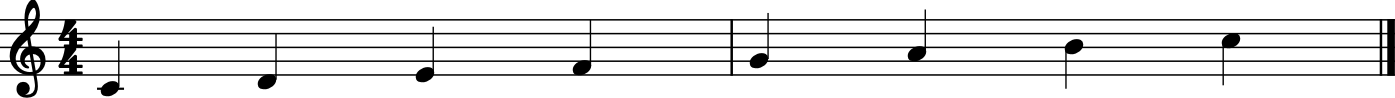

In [10]:
dj.conversion.convert(c_major_sub_notes, to='music21').show()

### Chords

A chord is multiple pitches played together, generally three. In Djalgo, chords are written as a list of pitches in the note format.

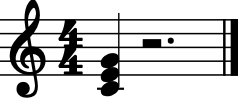

In [11]:
c_major_chord = ([60, 64, 67], 1, 0)
dj.conversion.convert([c_major_chord], to='music21').show()

:::{tip}
The `.show()` method renders a score by default, but you have access to other rendering options, such as `.show('midi')`.
:::

### Ornaments

We used the Djalgo package, but still haven't seen how it can help to generate music. Let's start with ornaments, which alter a list of notes to create a richer score. Djalgo has six types of ornaments: grace note, trill, mordent, arpeggio, turn and slide.

**Grace note** adds a note randomly drawned from the list given in `grace_pitches` at the place given by `note_index`.

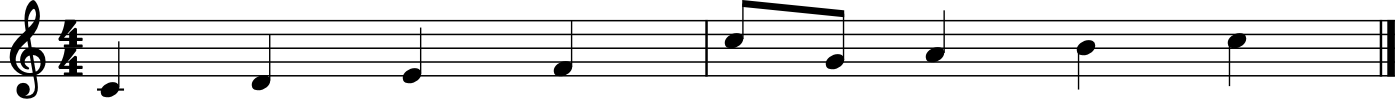

In [12]:
ornam = dj.harmony.Ornament(
    type='grace_note',
    grace_note_type='appoggiatura',
    grace_pitches=[72]
).generate(
    notes=c_major_sub_notes,
    note_index=4
)
dj.conversion.convert(ornam, to='music21').show()

**Trill** gets the degree given by `by` from the note at `note_index` and oscillates at rate of `trill_rate` between the note and its degree.

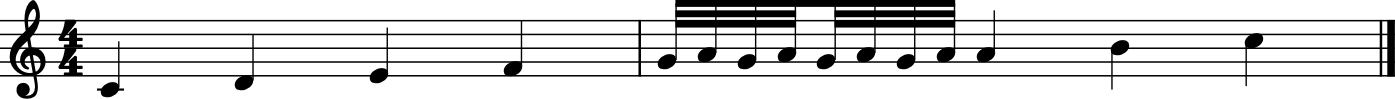

In [13]:
ornam = dj.harmony.Ornament(
    type='trill',
    trill_rate=0.125,
    by=1,
    tonic='C',
    scale_type='major'
).generate(
    notes=c_major_sub_notes,
    note_index=4
)
dj.conversion.convert(ornam, to='music21').show()

**Mordent** rapidly alternates between the original pitch and one step defined `by`.

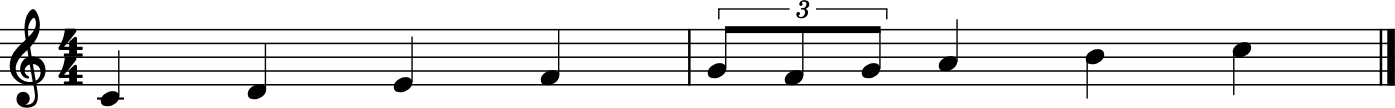

In [14]:
ornam = dj.harmony.Ornament(
    type='mordent',
    by=-1,
    tonic='C',
    scale_type='major'
).generate(
    notes=c_major_sub_notes,
    note_index=4
)
dj.conversion.convert(ornam, to='music21').show()

**Arpeggio** transforms a note to an arpeggio given by a list of degrees.

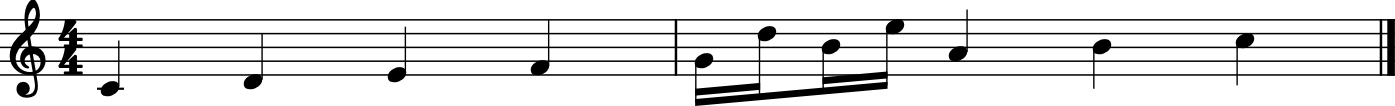

In [15]:
ornam = dj.harmony.Ornament(
    type='arpeggio',
    tonic='C',
    scale_type='major',
    arpeggio_degrees=[0, 4, 2, 5]
).generate(
    notes=c_major_sub_notes,
    note_index=4
)
dj.conversion.convert(ornam, to='music21').show()

**Turn** is a transition of four notes betweem `note_index` and the next note.

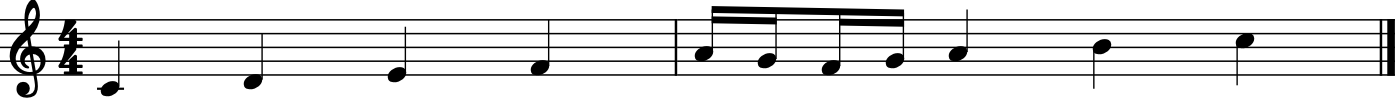

In [16]:
ornam = dj.harmony.Ornament(
    type='turn',
    tonic='C',
    scale_type='major'
).generate(
    notes=c_major_sub_notes,
    note_index=4
)
dj.conversion.convert(ornam, to='music21').show()

**Silde** is a glissando. However, in Djalgo, glissandos should be defined at the instrument level with your prefered package (`Instrument` in Pretty-midi and `Stream` in Music21). Instead of sliding, slide in djalgo transits on the chromatic scale from a note to the next.

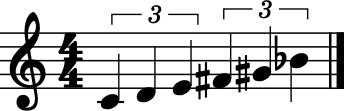

In [17]:
ornam = dj.harmony.Ornament(
    type='slide',
    slide_length=6
).generate(
    notes=[(60, 4, 0), (72, 4, 4)],
    note_index=0
)
dj.conversion.convert(ornam, to='music21').show()

### Voice

Voicing creates chords from pitch lists. These are just lists, but iterating through them can generate either chords and arpeggios.

In [18]:
pitch_chords = dj.harmony.Voice(
    tonic = 'C',
    scale_type = 'major',
    degrees=[0, 2, 4] # triads
).generate(pitches=c_major_sub)
print(pitch_chords)

[[60, 64, 67], [62, 65, 69], [64, 67, 71], [65, 69, 72], [67, 71, 74], [69, 72, 76], [71, 74, 77], [72, 76, 79]]


The `pitch_chords` object contains only pitches. To create a track, we must also have durations and offsets. We could reuse the loop written earlier.

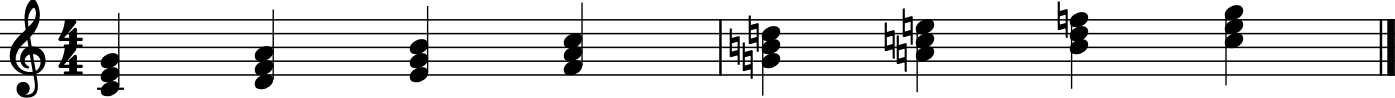

In [19]:
c_major_sub_notes_chordified = []
offset = 0
for chord in pitch_chords:
    c_major_sub_notes_chordified.append((chord, 1, offset))
    offset = offset + 1 
dj.conversion.convert(c_major_sub_notes_chordified, to='music21').show()

### Progression

Ever heard of the circle of fifths? It can be used to create progressions with chords that fit together. Why not using it to generate random progressions from different circles, the circle of fifths (`'P5'`) being the most popular. The radius argument is the spread of the chords in the circle across [major chords, minor chords, diminished chords], usually `[3, 3, 1]`.

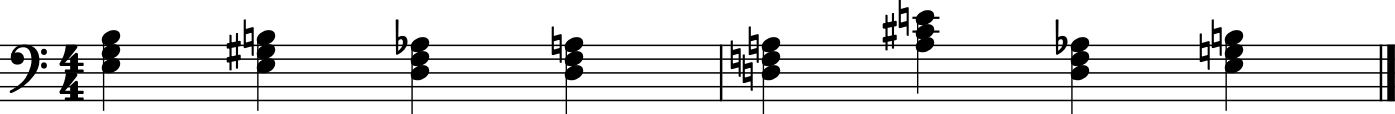

In [20]:
progression = dj.harmony.Progression(
    tonic_pitch='D3',
    circle_of='P5',
    radius=[3, 3, 1]
).generate(length=8, seed=5) # a seed is any random integer that allows you to reproduce the same outcomes from arandom process
progression_notes = []
offset = 0
for chord in progression:
    progression_notes.append((chord, 1, offset))
    offset = offset + 1 
dj.conversion.convert(progression_notes, to='music21').show()

### Rhythms

For now, all note durations was set to 1 quarter length, and offsets were set accordingly. A combination of durations and offsets is called a rhythm in Djalgo. Rhythms can be set by hand, but to leverage Djalgo, we can generate them randomly. The `random` method from the `rhythm` module draws numbers from a `durations` list until they sum up to the `measure_length`.

In [21]:
random_rhythm = dj.rhythm.Rhythm(
    measure_length=8,
    durations = [0.5, 1, 2]
).random(seed=3)
random_rhythm

[(0.5, 0.0),
 (0.5, 0.5),
 (2, 1.0),
 (2, 3.0),
 (0.5, 5.0),
 (1, 5.5),
 (0.5, 6.5),
 (1, 7.0)]

The `darwin` method uses a genetic algorithm to obtain similar results, but with a more elegant algorithm behind.

In [22]:
darwin_rhythm = dj.rhythm.Rhythm(
    measure_length=8,
    durations = [0.5, 1, 2]
).random(seed=12)
darwin_rhythm

[(1, 0.0),
 (2, 1.0),
 (0.5, 3.0),
 (1, 3.5),
 (2, 4.5),
 (0.5, 6.5),
 (0.5, 7.0),
 (0.5, 7.5)]

A random progression of the same length can be generated (`len(a)` take the length of the list `a`), mapped to the rhythm, and transformed to a Music21 stream to create a score or a midi.


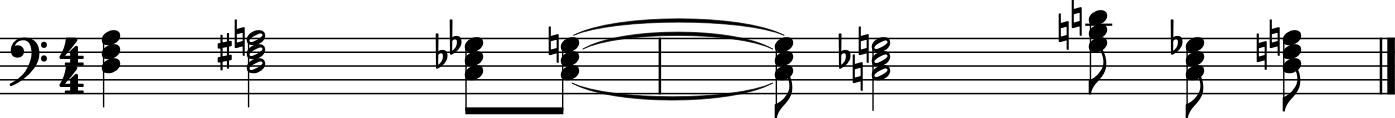

In [23]:
progression = dj.harmony.Progression(
    tonic_pitch='C3',
    circle_of='P5',
    radius=[3, 3, 1]
).generate(length=len(darwin_rhythm), seed=5)
random_progression = [(p, d, o) for p, (d, o) in zip(progression, darwin_rhythm)]
dj.conversion.to_music21(random_progression).show()

## Wrap up

Let's take our twinkle song.

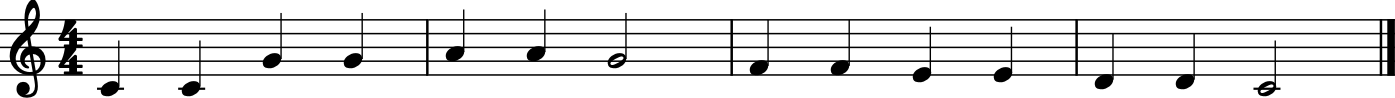

In [24]:
twinkle = twinkle_1 + twinkle_2
dj.conversion.to_music21(twinkle).show()

We will add a voice to index 0 and index 7.

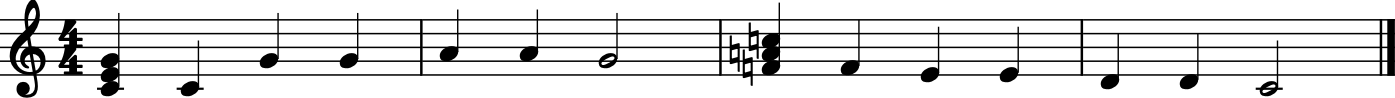

In [25]:
twinkle_pitches = [note[0] for note in twinkle]
twinkle_chords = dj.harmony.Voice(
    tonic = 'C',
    scale_type = 'major',
    degrees=[0, 2, 4] # triads
).generate(pitches=twinkle_pitches)
for i in [0, 7]:
    twinkle[i] = (twinkle_chords[i], twinkle[i][1], twinkle[i][2])
dj.conversion.to_music21(twinkle).show()

Some ornaments...

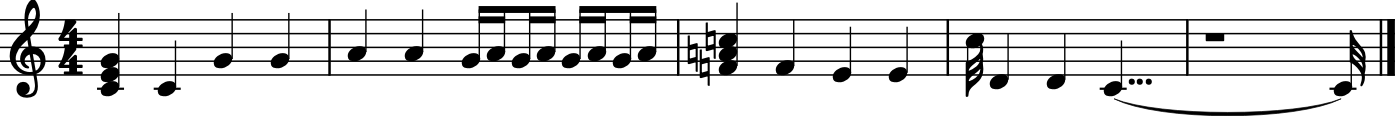

In [26]:
twinkle = dj.harmony.Ornament(
    type='grace_note',
    grace_note_type='acciaccatura',
    grace_pitches=[72]
).generate(
    notes=twinkle,
    note_index=11
)

twinkle = dj.harmony.Ornament(
    type='trill',
    trill_rate=0.25,
    by=1,
    tonic='C',
    scale_type='major'
).generate(
    notes=twinkle,
    note_index=6
)
dj.conversion.convert(twinkle, to='music21').show()

And let's hear our masterpiece!

In [27]:
dj.conversion.convert(twinkle, to='music21').show('midi')